<a href="https://colab.research.google.com/github/yaoliu0803/Colab_FasterRCNN_Pytorch/blob/main/faster_rcnn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#查看python版本
!python -V

Python 3.8.10


In [ ]:
# 查看cuda版本
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


## **1、克隆仓库**

In [ ]:
!git clone -b pytorch-1.0 --single-branch --depth=1 --recursive https://github.com/jwyang/faster-rcnn.pytorch.git

Cloning into 'faster-rcnn.pytorch'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 169 (delta 26), reused 83 (delta 12), pack-reused 0
Receiving objects: 100% (169/169), 1022.98 KiB | 1.13 MiB/s, done.
Resolving deltas: 100% (26/26), done.


## **2、创建数据文件夹**

In [ ]:
import os
os.chdir("/content/faster-rcnn.pytorch")
!mkdir data
os.chdir('data')
!mkdir pretrained_model
os.chdir('pretrained_model')

## **3、下载数据**

In [ ]:
#切换到数据文件夹路径
os.chdir("/content/faster-rcnn.pytorch/data")

#查看当前文件路径
!pwd

#下载数据
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCdevkit_08-Jun-2007.tar

/content/faster-rcnn.pytorch/data
--2023-02-02 14:33:25--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  7.36MB/s    in 47s     

2023-02-02 14:34:13 (9.29 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]

--2023-02-02 14:34:13--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/x-tar]
Saving to: ‘VOCtest_06-Nov-2007.tar’

VOCtest_06

3.1解压数据到data/VOCdevkit

In [ ]:
!pwd
!tar xvf VOCtrainval_06-Nov-2007.tar
!tar xvf VOCtest_06-Nov-2007.tar
!tar xvf VOCdevkit_08-Jun-2007.tar

流式输出内容被截断，只能显示最后 5000 行内容。
VOCdevkit/VOC2007/JPEGImages/000817.jpg
VOCdevkit/VOC2007/JPEGImages/000819.jpg
VOCdevkit/VOC2007/JPEGImages/000821.jpg
VOCdevkit/VOC2007/JPEGImages/000824.jpg
VOCdevkit/VOC2007/JPEGImages/000825.jpg
VOCdevkit/VOC2007/JPEGImages/000833.jpg
VOCdevkit/VOC2007/JPEGImages/000835.jpg
VOCdevkit/VOC2007/JPEGImages/000836.jpg
VOCdevkit/VOC2007/JPEGImages/000837.jpg
VOCdevkit/VOC2007/JPEGImages/000838.jpg
VOCdevkit/VOC2007/JPEGImages/000839.jpg
VOCdevkit/VOC2007/JPEGImages/000840.jpg
VOCdevkit/VOC2007/JPEGImages/000841.jpg
VOCdevkit/VOC2007/JPEGImages/000844.jpg
VOCdevkit/VOC2007/JPEGImages/000846.jpg
VOCdevkit/VOC2007/JPEGImages/000852.jpg
VOCdevkit/VOC2007/JPEGImages/000853.jpg
VOCdevkit/VOC2007/JPEGImages/000856.jpg
VOCdevkit/VOC2007/JPEGImages/000858.jpg
VOCdevkit/VOC2007/JPEGImages/000861.jpg
VOCdevkit/VOC2007/JPEGImages/000864.jpg
VOCdevkit/VOC2007/JPEGImages/000866.jpg
VOCdevkit/VOC2007/JPEGImages/000869.jpg
VOCdevkit/VOC2007/JPEGImages/000870.jpg
VOCdevkit/VOC

In [ ]:
# 切换到data目录下进行软连接 或者更改VOCdevkit文件名为VOCdevkit2007
os.chdir("/content/faster-rcnn.pytorch/data")
# 建立软连接
!ln -s $VOCdevkit VOCdevkit2007 #注意！如果上面解压缩得到的文件夹名字为"VOCdevdit"，要将其改为“VOCdevdit2007"，否则后面会报错。

## **4.下载预训练模型**

VGG16: Dropbox, VT Server
ResNet101: Dropbox, VT Server
基于caffe训练的模型要比基于pytorch训练的模型表现好些，推荐下载Dropbox。
下载完以后，把这两个模型都放进/data/pretrained_model/里。

In [ ]:
!pwd
!mkdir /content/faster-rcnn.pytorch/data/pretrained_model/

/content/faster-rcnn.pytorch/data
mkdir: cannot create directory ‘/content/faster-rcnn.pytorch/data/pretrained_model/’: File exists


In [ ]:
#切换到模型保存目录
os.chdir('/content/faster-rcnn.pytorch/data/pretrained_model')

In [ ]:
# 下载预训练模型res101
!wget https://filebox.ece.vt.edu/~jw2yang/faster-rcnn/pretrained-base-models/resnet101_caffe.pth
# 下载预训练模型vgg16
!wget https://filebox.ece.vt.edu/~jw2yang/faster-rcnn/pretrained-base-models/vgg16_caffe.pth

--2023-02-02 14:34:59--  https://filebox.ece.vt.edu/~jw2yang/faster-rcnn/pretrained-base-models/resnet101_caffe.pth
Resolving filebox.ece.vt.edu (filebox.ece.vt.edu)... 128.173.88.43
Connecting to filebox.ece.vt.edu (filebox.ece.vt.edu)|128.173.88.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178678116 (170M)
Saving to: ‘resnet101_caffe.pth’

resnet101_caffe.pth 100%[===================>] 170.40M  5.63MB/s    in 27s     

2023-02-02 14:35:28 (6.22 MB/s) - ‘resnet101_caffe.pth’ saved [178678116/178678116]

--2023-02-02 14:35:28--  https://filebox.ece.vt.edu/~jw2yang/faster-rcnn/pretrained-base-models/vgg16_caffe.pth
Resolving filebox.ece.vt.edu (filebox.ece.vt.edu)... 128.173.88.43
Connecting to filebox.ece.vt.edu (filebox.ece.vt.edu)|128.173.88.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553433685 (528M)
Saving to: ‘vgg16_caffe.pth’

vgg16_caffe.pth     100%[===================>] 527.79M   805KB/s    in 1m 40s  

2023-02-0

## **5.环境配置**

In [ ]:
#切换到项目路径
os.chdir("/content/faster-rcnn.pytorch")
#查看路径
!ls

cfgs  demo.py  _init_paths.py  LICENSE	  requirements.txt  trainval_net.py
data  images   lib	       README.md  test_net.py


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install -U torch==1.4 torchvision==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.4/753.4 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.4.0 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==

In [ ]:
# 由于scipy的库版本太高，需要降低版本
# 改成1.2.1，在训练的前一步输入以下命令就可以成功运行啦
!pip3 uninstall scipy

Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/scipy-1.7.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/scipy.libs/libopenblasp-r0-8b9e111f.3.17.so
    /usr/local/lib/python3.8/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.7.3


In [ ]:
!pip install scipy==1.2.1 -i https://pypi.douban.com/simple/

Looking in indexes: https://pypi.douban.com/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scipy: filename=scipy-1.2.1-cp38-cp38-linux_x86_64.whl size=55410524 sha256=99af32ed07617ef59869f5729fdf900d268d24846b5e29cd69a7fc2e7a768336
  Stored in directory: /root/.cache/pip/wheels/9b/47/73/66152457a23f2b9f274756bc6ae03ac55e098e7af2c5371cec
Successfully built scipy
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.2.1 which is incompatible.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.2.1 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.2.1 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires scipy

In [ ]:
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 KB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=9a78c1040687dfcfb4e85a6805e61a3109416b782ecab181e42ee14d709a6456
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch 1.4.0 which is incompatible.
fastai 2.7.10 requires torchvision>=0.8.2, but you have torchvision 0.5.0 whic

## **6.编译**

In [ ]:
#切换路径 /lib
os.chdir("/content/faster-rcnn.pytorch/lib")
!pwd
!ls

/content/faster-rcnn.pytorch/lib
datasets  model  pycocotools  roi_data_layer  setup.py


In [ ]:
!python setup.py build develop

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.8
creating build/lib.linux-x86_64-3.8/model
copying model/__init__.py -> build/lib.linux-x86_64-3.8/model
creating build/lib.linux-x86_64-3.8/pycocotools
copying pycocotools/cocoeval.py -> build/lib.linux-x86_64-3.8/pycocotools
copying pycocotools/mask.py -> build/lib.linux-x86_64-3.8/pycocotools
copying pycocotools/__init__.py -> build/lib.linux-x86_64-3.8/pycocotools
copying pycocotools/coco.py -> build/lib.linux-x86_64-3.8/pycocotools
creating build/lib.linux-x86_64-3.8/datasets
copying datasets/imdb.py -> build/lib.linux-x86_64-3.8/datasets
copying datasets/vg.py -> build/lib.linux-x86_64-3.8/datasets
copying datasets/pascal_voc_rbg.py -> build/lib.linux-x86_64-3.8/datasets
copying datasets/__init__.py -> build/lib.linux-x86_64-3.8/datasets
copying datasets/coco.py -> build/lib.linux-x86_64-3.8/datasets
copying datasets/ds_utils.py -> build/lib.linux-x86_64-3.8/datasets
copying datasets/factory.py -> bu

## **7.更改 trainval_net.py 文件**


195行：cfg.TRAIN.USE_FLIPPED = False #把True 改成 False

**目的：不对图片进行翻折，节省数据加载的时间**

## **8.训练**

编译成功后，就可以开始训练了。

训练参数可以参考下表配置

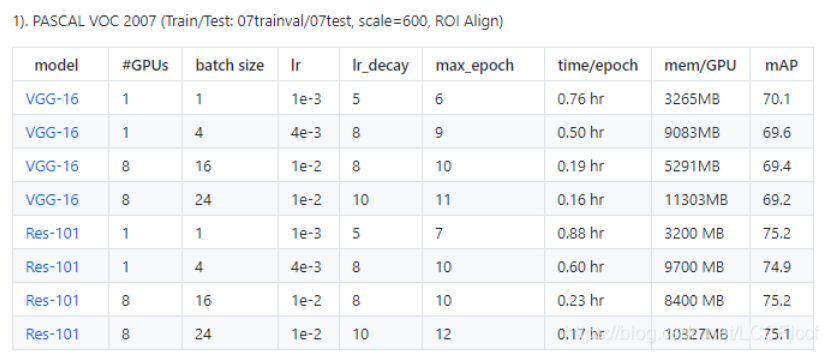

这里注意一下，**训练的时候，一定要在faster-rcnn.pytorch目录下**。上一步我们进入到了data目录下，所以我这里直接用代码返回到上个目录下就行

In [ ]:
#查看当前路径
!pwd

/content/faster-rcnn.pytorch/lib


In [ ]:
#切换路径
os.chdir("/content/faster-rcnn.pytorch")

In [ ]:
# 这里的训练参数使用了表格的倒数三行的参数。
# 训练代码（参考）：
# 切换GPU运行
!CUDA_VISIBLE_DEVICES=0 python trainval_net.py \
                    --dataset pascal_voc \
                    --net res101 \
                    --bs 4 \
                    --nw 0 \
                    --lr 0.004 \
                    --lr_decay_step 8 \
                    --epochs 10 \
                    --cuda  

Called with args:
Namespace(batch_size=4, checkepoch=1, checkpoint=0, checkpoint_interval=10000, checksession=1, class_agnostic=False, cuda=True, dataset='pascal_voc', disp_interval=100, large_scale=False, lr=0.004, lr_decay_gamma=0.1, lr_decay_step=8, mGPUs=False, max_epochs=10, net='res101', num_workers=0, optimizer='sgd', resume=False, save_dir='models', session=1, start_epoch=1, use_tfboard=False)
/content/faster-rcnn.pytorch/lib/model/utils/config.py:374: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))
Using config:
{'ANCHOR_RATIOS': [0.5, 1, 2],
 'ANCHOR_SCALES': [8, 16, 32],
 'CROP_RESIZE_WITH_MAX_POOL': False,
 'CUDA': False,
 'DATA_DIR': '/content/faster-rcnn.pytorch/data',
 'DEDUP_BOXES': 0.0625,
 'EPS': 1e-14,
 'EXP_DIR': 'res101',
 'FEAT_STRIDE': [16],
 'GPU_ID': 0,
 'MATLAB': 'matlab',
 'MAX_NUM_GT_BOXES': 20,
 'MOBILENET': {'DE

**注意：colab好像一次只能用12个小时，12个小时还没训练完的话会自动停止训练，并且资源会被谷歌回收，也就是说所有结果都会被清空，因此，请注意你的训练时长！**

## **9.总结**

1、可以把Colab看成是一台带有GPU的Ubuntu虚拟机，只不过我们只能用命令行的方式操作它。你可以选择执行系统命令，亦或是直接编写运行python代码。

2、挂载完Google Drive，会在虚拟机里生成一个drive文件夹，直接将Google Drive当成是一块硬盘即可。访问drive文件夹里的文件，就是在访问你的Google Drive里的文件。

3、Colab最多连续使用12小时，超过时间系统会强制掐断正在运行的程序并收回占用的虚拟机。（好像再次连接到虚拟机后，虚拟机是被清空的状态，需要重新配置和安装库等等）
4.在将VOCdevkit文件夹改名字为VOCdevkit2007时，首先要先删除data目录下的VOCdevkit2007的文本，注意这里是data目录的下的本文，只有删除后才能够改名字成功，不然会重名是无法修改的。

5、最后训练的时候，一般都要在训练前加上“!pip install scipy==1.2.1”这一步，才能够训练成功。